<a href="https://colab.research.google.com/github/moeinghaeini/Audio-Pattern-Recognition/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH = "/content/drive/MyDrive/University of Milan/Audio Pattern Recognition/Data.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

def prepare_datasets_rf(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets for Random Forest.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) # Added random_state for reproducibility
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=42) # Added random_state

    # Flatten the features for Random Forest
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_validation = X_validation.reshape(X_validation.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

    return X_train, X_validation, X_test, y_train, y_validation, y_test

In [5]:
def build_and_train_random_forest(X_train, y_train):
    """Builds and trains a Random Forest Classifier.

    :param X_train (ndarray): Input training set
    :param y_train (ndarray): Target training set
    :return model: Trained RandomForestClassifier model
    """
    # Initialize the Random Forest Classifier
    # You can adjust parameters like n_estimators, max_depth, etc.
    model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

    # Train the model
    model.fit(X_train, y_train)

    return model

In [6]:
def evaluate_random_forest(model, X_test, y_test):
    """Evaluates the Random Forest model using Confusion Matrix and Classification Report.

    :param model: Trained RandomForestClassifier model
    :param X_test: Test dataset features
    :param y_test: True labels for the test dataset
    """
    # Get model predictions
    y_pred = model.predict(X_test)

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Random Forest")
    plt.show()

    # Print classification report
    print("Classification Report (Random Forest):")
    print(classification_report(y_test, y_pred, digits=4))

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy (Random Forest): {accuracy:.4f}")

In [7]:
def predict_random_forest(model, X, y_true):
    """Predicts a single sample using the trained Random Forest model.

    :param model: Trained classifier
    :param X: Input data for a single sample (flattened)
    :param y_true (int): True target label for the sample
    """
    # Reshape the input data for prediction if needed (already flattened in prepare_datasets_rf)
    # X = X.reshape(1, -1) # Uncomment if X is not already flattened

    # Perform prediction
    prediction = model.predict(X.reshape(1, -1)) # Reshape to have shape (1, num_features)

    print("Target: {}, Predicted label: {}".format(y_true, prediction[0]))

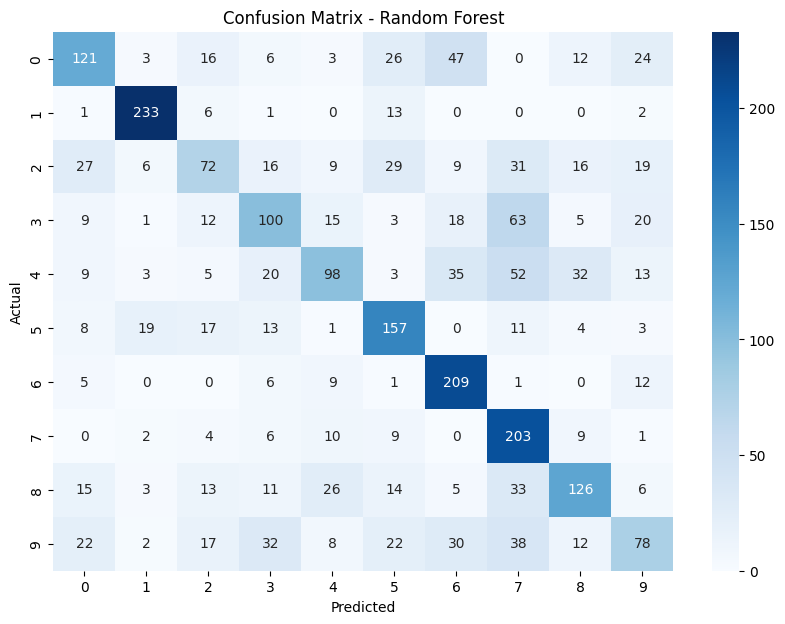

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0     0.5576    0.4690    0.5095       258
           1     0.8566    0.9102    0.8826       256
           2     0.4444    0.3077    0.3636       234
           3     0.4739    0.4065    0.4376       246
           4     0.5475    0.3630    0.4365       270
           5     0.5668    0.6738    0.6157       233
           6     0.5921    0.8601    0.7013       243
           7     0.4699    0.8320    0.6006       244
           8     0.5833    0.5000    0.5385       252
           9     0.4382    0.2989    0.3554       261

    accuracy                         0.5595      2497
   macro avg     0.5530    0.5621    0.5441      2497
weighted avg     0.5541    0.5595    0.5434      2497


Accuracy (Random Forest): 0.5595
Target: 4, Predicted label: 3


In [8]:
if __name__ == "__main__":

    # 1. Get train, validation, test splits (for Random Forest)
    X_train_rf, X_validation_rf, X_test_rf, y_train_rf, y_validation_rf, y_test_rf = prepare_datasets_rf(0.25, 0.2)

    # 2. Build and train Random Forest model
    rf_model = build_and_train_random_forest(X_train_rf, y_train_rf)

    # 3. Evaluate Random Forest model on test set
    evaluate_random_forest(rf_model, X_test_rf, y_test_rf)

    # 4. Pick a sample to predict from the test set
    sample_index = 100  # You can choose a different index
    X_to_predict_rf = X_test_rf[sample_index]
    y_to_predict_rf = y_test_rf[sample_index]

    # 5. Predict sample using Random Forest model
    predict_random_forest(rf_model, X_to_predict_rf, y_to_predict_rf)